In [169]:
import networkx as nx
import argparse
import collections
import sourmash_lib.signature
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import glob
import itertools
%matplotlib inline

In [133]:
sigs=['../sourmash-sigs/abundtrim/ERR315861_1.head.paired.fq.gz.abundtrim.gz.k21.s10000.sig',
      '../sourmash-sigs/abundtrim/ERR315862_1.head.paired.fq.gz.abundtrim.gz.k21.s10000.sig',
      '../sourmash-sigs/abundtrim/ERR315863_1.head.paired.fq.gz.abundtrim.gz.k21.s10000.sig',
      '../sourmash-sigs/abundtrim/ERR318618_1.head.paired.fq.gz.abundtrim.gz.k21.s10000.sig',
      '../sourmash-sigs/abundtrim/ERR318619_1.head.paired.fq.gz.abundtrim.gz.k21.s10000.sig',]

In [213]:
sigs=[file for file in glob.glob('../sourmash-sigs/abundtrim/*sig')]


In [214]:
counts = collections.Counter()
all_hashes=set()
names=[]
for filename in sigs:
    name=filename.split('/')[-1].split('_')[0] 
    names+=[name]
    sig = sourmash_lib.signature.load_one_signature(filename, select_ksize=21)
    mh = sig.minhash
    hashes = mh.get_mins()
    all_hashes=all_hashes.union(set(hashes))


In [215]:
df=pd.DataFrame(index=names, columns=all_hashes, data=0)

for filename,name in zip(sigs,names):
    sig = sourmash_lib.signature.load_one_signature(filename, select_ksize=21)
    mh = sig.minhash
    hashes = mh.get_mins()
    df.loc[name,hashes]=1
    

In [291]:
len(df.columns[df.loc[['ERR315858','ERR315861']].sum()==2])

289

In [325]:
def make_graph(df):
    G=nx.Graph()
    nodes=df.index
    node_sizes=df.sum(axis=1)
    for node, size in zip(nodes, node_sizes):
        G.add_node(node,size=size)
        
    for comHash in df.columns[df.sum()>1]:
        inds=df[df[comHash]!=0].index
    #     G.add_path(inds)
        for pair in itertools.combinations(inds, r=2):
            if G.has_edge(pair[0],pair[1]):
                w=G[pair[0]][pair[1]]['weight']
                w+=1
                G[pair[0]][pair[1]]['weight']=w
                pass
            else:
                G.add_edge(pair[0],pair[1])
                G[pair[0]][pair[1]]['weight']=1
    return(G)

def remove_edges(G, k):
    rm=[]
    for e in G.edges_iter(data='weight'):
        if e[2] < k:
            rm+=[e]
    G.remove_edges_from(rm)
    return(G)

In [326]:
G=make_graph(df)

In [308]:
k=200
rm=[]
for e in G_working.edges_iter(data='weight'):
    if e[2] < k:
        rm+=[e]
G_working.remove_edges_from(rm)


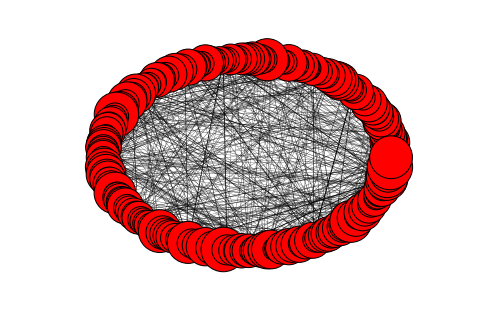

In [309]:
weights = [G_working[u][v]['weight']/1000 for u,v in G_working.edges()]
nx.draw_circular(G_working, node_size = node_sizes, width=weights)    


In [310]:
d=[g for g in G.degree_iter()]

In [314]:
degree_no_prune=pd.DataFrame(d)